In [52]:
%pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import time
import datetime
import yfinance as yf

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [53]:
# Define various variables including the stock name, start and end date of data to be stored, and the interval 
ticker = "AAPL"
begin = "2013-01-02"
terminate = "2022-09-10"
period = "1wk"

apple = yf.Ticker(f"{ticker}")
hist = apple.history(start=f"{begin}", end=f"{terminate}", interval=f"{period}")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-01,17.038160,17.074463,15.850024,16.117678,1.991973e+09,0.0,0.0
2013-01-08,16.281032,16.363482,15.336554,15.436233,2.552172e+09,0.0,0.0
2013-01-15,15.330105,15.713127,14.871093,15.382405,2.494178e+09,0.0,0.0
2013-01-22,15.522686,15.843562,13.382686,13.838928,4.777452e+09,0.0,0.0
2013-01-29,14.105658,14.231794,13.598038,13.607883,2.324249e+09,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-09,164.020004,173.389999,163.250000,173.190002,3.125863e+08,0.0,0.0
2022-08-16,172.779999,176.149994,167.139999,167.570007,3.375823e+08,0.0,0.0
2022-08-23,167.080002,171.050003,159.820007,161.380005,3.114818e+08,0.0,0.0


In [54]:
# y value closing stock price dataset
df1 = hist["Close"]
y_train = np.array(df1)

In [55]:
data = df1.reset_index()
x_train = data["Date"]

In [56]:
print(y_train)
print(x_train)

[ 16.11767769  15.43623257  15.38240528  13.83892822  13.60788345
  14.76495266          nan  14.23923492  13.70205116  12.99806786
  13.54949188  14.10184479  14.34506512  13.27223301  13.18868256
  12.99188042  12.33648586  13.30967617  14.25625706  14.07151985
          nan  13.79679012  13.86594391  14.03944206  13.67095089
  13.45633507  12.53868484  12.74676228  12.92835903  13.31429005
  13.27909851  13.94817638  14.62286186  14.55775833          nan
  15.9199791   15.77042007  15.27658749  15.87074947  14.11332798
  15.38381386  14.94830227  15.29319859  15.5531292   16.34702492
  16.61417007  16.51603508  16.27460289          nan  16.35637283
  16.51753044  17.38450241  17.86387062  17.58224487  17.97929955
  17.48825455  17.15427399  16.89566422  17.05145264  17.36147308
  15.81707478  16.68309784          nan  17.25886536  16.73727417
  16.74394608  16.84419632  16.71158218  17.10657692  17.02884483
  16.60783386  16.55104637  16.85213089  18.84835815  19.0663147
  18.808382

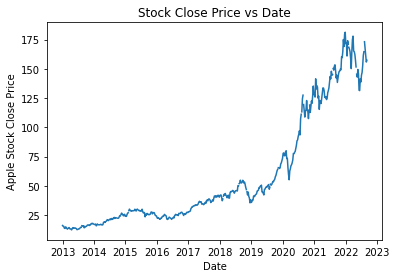

In [57]:
plt.plot(x_train, y_train) 
# Set the title
plt.title("Stock Close Price vs Date")
# Set the y-axis label
plt.ylabel("Apple Stock Close Price")
# Set the x-axis label
plt.xlabel("Date")
plt.show()

In [58]:
# convert x training data for stock prices to matrix to be implemented in polynomial regression 
def Create_Matrix_Train(arr, order):
    l = len(arr)
    array = np.zeros(l)
    for i in range (l):
        date = str(arr[i])[:10]
        year = int(date[:4])
        month = int(date[5:7])
        day = int(date[-2:])
        second = int(time.mktime(datetime.datetime(year, month, day, 23, 59).timetuple()))
        array[i] = second
    length = len(array)
    matrix = []
    for j in range(length):
        for i in range(order):
            matrix.append(array[j]**(i+1))
    array = np.array(matrix).reshape((length, order))
    return array

poly_order = 6

x_train = Create_Matrix_Train(x_train, poly_order)

In [59]:
def zscore_normalize_features(X):

  # find the mean of each column/feature
  mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
  # find the standard deviation of each column/feature
  sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
  # element-wise, subtract mu for that column from each example, divide by std for that column
  X_norm = (X - mu) / sigma      
  return (X_norm, mu, sigma)

In [60]:
x_train_norm = zscore_normalize_features(x_train)
x_train = x_train_norm[0]

In [61]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [62]:
w_init = np.zeros(poly_order)
b_init = 1

cost = compute_cost(x_train, y_train, w_init, b_init)
print(w_init)
print(f'Cost at optimal w : {cost}')

[0. 0. 0. 0. 0. 0.]
Cost at optimal w : nan


In [63]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [64]:
# Compute and display gradient with w initialized to zeroes
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)

#tmp_dj_dw_div, tmp_dj_db_div = compute_gradient(x_train_div, y_train_div, initial_w_div, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): nan [nan nan nan nan nan nan]


In [65]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [66]:
# initialize parameters
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost      nan   
Iteration  100: Cost      nan   
Iteration  200: Cost      nan   
Iteration  300: Cost      nan   
Iteration  400: Cost      nan   
Iteration  500: Cost      nan   
Iteration  600: Cost      nan   
Iteration  700: Cost      nan   
Iteration  800: Cost      nan   
Iteration  900: Cost      nan   
b,w found by gradient descent: nan,[nan nan nan nan nan nan] 
prediction: nan, target value: 16.117677688598633
prediction: nan, target value: 15.436232566833496
prediction: nan, target value: 15.382405281066895
prediction: nan, target value: 13.83892822265625
prediction: nan, target value: 13.60788345336914
prediction: nan, target value: 14.764952659606934
prediction: nan, target value: nan
prediction: nan, target value: 14.239234924316406
prediction: nan, target value: 13.702051162719727
prediction: nan, target value: 12.998067855834961
prediction: nan, target value: 13.549491882324219
prediction: nan, target value: 14.101844787597656
prediction: nan, target v